# Execution Trace
- **Start Timestamp (UTC)**: 2025-01-17T06:30:57.182424+00:00
- **OS**: Linux 5.15.0-125-generic #135~20.04.1-Ubuntu SMP Mon Oct 7 13:56:22 UTC 2024
- **Machine**: x86_64
- **Python Info**: 3.12.4-final0
- **Python Environment Hash**: 254ed744c6afa6cb7a82cb312f75f9fcd1c4da2c13d780212e30fa7339309c54
- **CAPTCHA**:

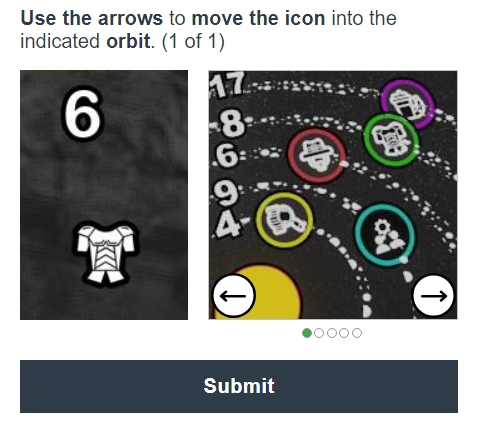

## Objective Identification

In [ ]:
def stage1(frames):
    # Step 1: Provide one-sentence visual description of each frame.
    describe(0, "The frame contains an instruction to use arrows to move an icon into the indicated orbit, with a progress indicator at the bottom.")
    describe(1, "The frame shows a circular orbit map with icons in different orbits, and left/right arrow buttons below.")
    describe(2, "The frame displays the number '6' and an icon of armor, indicating a specific orbit and target icon.")
    describe(3, "The frame contains a 'Submit' button on a dark background.")

    # Step 2: Identify the relationships between frames.
    relate(0, 1, "Frame 0 provides instructions for the task shown in Frame 1.")
    relate(1, 2, "Frame 1 shows the orbit map, and Frame 2 specifies the target orbit and icon.")
    relate(1, 3, "Frame 1 allows interaction to align the icon, and Frame 3 is used to submit the solution.")

    # Step 3: Identify the sequential events and final visual criteria.
    objective("Click the left or right arrows to move the icon into the orbit labeled '6' with the armor icon, then click 'Submit' to complete the task.")

## Structure Abstraction

In [ ]:
def stage2(frames):
    # Frame 0: Instruction frame
    frame_0 = frames[0]
    frame_0.set_frame_as("POINTABLE")  # Instructions are pointable for reference.

    # Frame 1: Circular orbit map with icons and arrow buttons
    frame_1 = frames[1]
    left_arrow = frame_1.get_element("left", "white circular button with left arrow")
    right_arrow = frame_1.get_element("right", "white circular button with right arrow")
    left_arrow.set_element_as("CLICKABLE")  # Left arrow is clickable.
    right_arrow.set_element_as("CLICKABLE")  # Right arrow is clickable.

    # Frame 2: Target icon and number
    frame_2 = frames[2]
    # Frame 2 is dependent on Frame 1 and provides context, so it is not interactable.

    # Frame 3: Submit button
    frame_3 = frames[3]
    submit_button = frame_3.get_element("down", "Submit button on dark background")
    submit_button.set_element_as("NEXT")  # Submit button is used to complete the task.

    return {
        "Frame 0": {"interactable": "POINTABLE"},
        "Frame 1": {"elements": [
            {"position": "left", "interactable": "CLICKABLE"},
            {"position": "right", "interactable": "CLICKABLE"}
        ]},
        "Frame 2": {"interactable": None},  # Dependent frame, not interactable.
        "Frame 3": {"elements": [
            {"position": "down", "interactable": "NEXT"}
        ]}
    }

## Solution Composition

In [ ]:
def stage3(frames):
    # Extract the target number and icon from Frame 2
    target_image = frames[2].image
    target_icon = ask([target_image], "ignore the number, describe the icon", answer_type="str")[0]
    target_orbit = ask([target_image], "ignore icon, what is the number?", answer_type="int")[0]

    # Get all choices in Frame 1
    left_arrow = frames[1].get_interactable(0)
    right_arrow = frames[1].get_interactable(1)
    choices = get_all_choices(left_arrow, right_arrow, frames[1])

    # Mark the icons in each choice for comparison
    marked_images = mark([choice.image for choice in choices], "icon")

    # Compare each choice with the target criteria
    comparison = compare(marked_images, f"Which image has the icon '{target_icon}' in orbit '{target_orbit}'?", target_image)

    # Select the correct choice
    for choice, is_correct in zip(choices, comparison):
        if is_correct:
            choice.select()
            break

    # Click the submit button in Frame 3
    submit_button = frames[3].get_interactable(0)
    click(submit_button)

In [ ]:
PROMPT = '''
## Objective
Given the list of images, answer the question: ignore the number, describe the icon
Output a list of strings for each image.
You should follow the format `answer(strings=["a", "b", ...])` to answer the question.

'''

Image 0
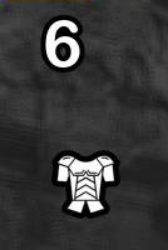

In [ ]:
IMAGES = 1

In [ ]:
RESPONSE = '''
answer(strings=["armor icon"])
'''
TIME = 1.169299993198365
FINGERPRINT = fp_60a3f2dc65
TOTAL_TOKENS = 323
PROMPT_TOKENS = 317
COMPLETION_TOKENS = 6

---

In [ ]:
PROMPT = '''
## Objective
Given the list of images, answer the question: ignore icon, what is the number?
Output a list of numbers for each image.
You should follow the format `answer(numbers=[1, 2, ...])` to answer the question.

'''

Image 0
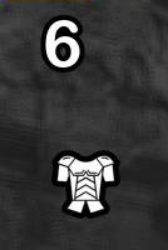

In [ ]:
IMAGES = 1

In [ ]:
RESPONSE = '''
answer(numbers=[6])
'''
TIME = 1.1997117390856147
FINGERPRINT = fp_60a3f2dc65
TOTAL_TOKENS = 508
PROMPT_TOKENS = 502
COMPLETION_TOKENS = 6

---

In [ ]:
PROMPT = '''
## Objective
Given the list of items, compare them with Reference and see if it satisfies the objective: Which image has the icon 'armor icon' in orbit '6'?
Output a list of (True/False) for each item.
You should follow the format answer(booleans=[True, False, ...]) to answer the question.
## Guidelines
1. First, describe the icons from top to bottom in each image.
2. Next, identify the orbit numbers from top to botton
3, Finally, find the number + description that is closest to reference.4. There can only be 1 True.
'''

Reference Item 0 Item 1 Item 2 Item 3 Item 4
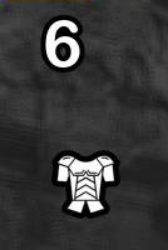
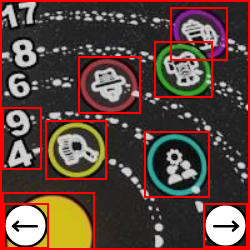
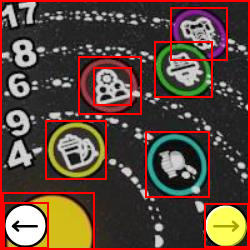
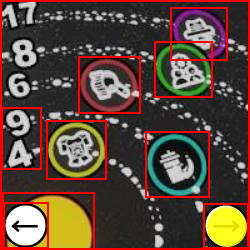
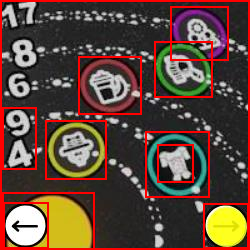
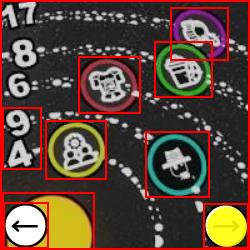

In [ ]:
IMAGES = 6

In [ ]:
RESPONSE = '''
### Step 1: Describe the icons from top to bottom in each image.

#### Item 0:
- Orbit 6: Hat icon
- Orbit 8: Armor icon
- Orbit 9: Wrench icon
- Orbit 4: Flower icon

#### Item 1:
- Orbit 6: Flower icon
- Orbit 8: Armor icon
- Orbit 9: Wrench icon
- Orbit 4: Turtle icon

#### Item 2:
- Orbit 6: Wrench icon
- Orbit 8: Flower icon
- Orbit 9: Armor icon
- Orbit 4: Mug icon

#### Item 3:
- Orbit 6: Mug icon
- Orbit 8: Wrench icon
- Orbit 9: Armor icon
- Orbit 4: Hat icon

#### Item 4:
- Orbit 6: Armor icon
- Orbit 8: Mug icon
- Orbit 9: Flower icon
- Orbit 4: Hat icon

---

### Step 2: Identify the orbit numbers from top to bottom.

- Orbit 6 is the second orbit from the top in all images.

---

### Step 3: Find the number + description that is closest to the reference.

The reference shows the **armor icon** in **orbit 6**. Only **Item 4** matches this description.

---

### Final Answer:
```python
answer(booleans=[False, False, False, False, True])
```
'''
TIME = 4.598310778848827
FINGERPRINT = fp_60a3f2dc65
TOTAL_TOKENS = 1944
PROMPT_TOKENS = 1640
COMPLETION_TOKENS = 304

---